## Step 1: Import packages

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy.stats as ss
import statsmodels.api as sm
import seaborn as sns

## Step 2: Provide data

In [2]:
df = pd.DataFrame()
df.index.name = 'Weeks'# name the Index

In [3]:
np.random.seed(23)
# Create dataframe with random values (Normal distibution with set mean and standard deviation value)
df['Advertising Spend'] = ss.norm.ppf(np.random.random(52), loc=150, scale=22).astype(int)
df['Product Sales'] = ss.norm.ppf(np.random.random(52), loc=200, scale=30).astype(int)
x = df['Advertising Spend'] # define explanatory variable
y = df['Product Sales'] # define response variable
#df['Product Sales'] = (df['Advertising Spend'] * 15) + (np.random.randint(52) * 2)
df

,Advertising Spend,Product Sales
Weeks,,
0,150,227
1,185,228
2,165,178
3,137,157
4,133,197
5,160,235
6,128,168
7,143,177
8,156,241


## Step 3: Create a model and fit it

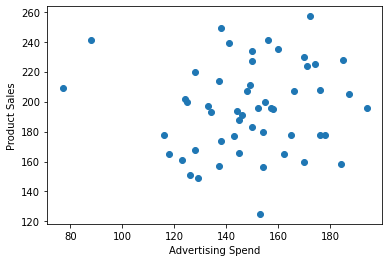

In [4]:
# plot a scatter plot to visualise the linear relationship
plt.plot('Advertising Spend', 'Product Sales', data=df, linestyle='none', marker='o')
plt.ylabel('Product Sales')
plt.xlabel('Advertising Spend')
plt.show()

## Step 4: Create a model and fit it

In [5]:
x = sm.add_constant(x) # adding a constant
model = sm.OLS(y, x).fit() # #fit linear regression model

## Step 5: Get results

In [6]:
print(model.summary()) #view model summary

                            OLS Regression Results                            
Dep. Variable:          Product Sales   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.015
Method:                 Least Squares   F-statistic:                    0.2330
Date:                Mon, 04 Oct 2021   Prob (F-statistic):              0.631
Time:                        21:57:40   Log-Likelihood:                -249.28
No. Observations:                  52   AIC:                             502.6
Df Residuals:                      50   BIC:                             506.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               182.6518     26.93

In [7]:
print(model.params)

const                182.651818
Advertising Spend      0.086330
dtype: float64


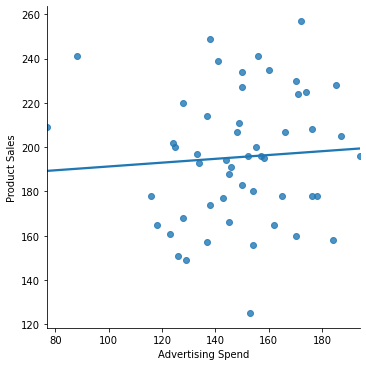

In [8]:
sns.lmplot(x='Advertising Spend', y='Product Sales', data=df, ci=None)

The regression equation is **182.6518 + 0.0863** * (advertising spend)

- The intercept value of 182.65 is the estimated mean value of product sales when the advertising spend is zero.
- Here 0.0863 tells us that product sales on average increase by £86.30, for additional unit of ad spend.

## Step 6: Making Predictions
The below predicts product sales with £200k in ad spend

In [9]:
pred_y = 100

In [10]:
prod_sales = model.params[0] + (model.params[1] * pred_y)

In [11]:
prod_sales

191.28478687639142

The predicted sales for a product with 100k spend is £199,917

### R-squared (aka the Coefficient of Determination)
R-squared indicates goodness-of-fit. It measures the amount of variation in the response variable (Product sales) is explained by the predictor variable (advertising spend). As R-squared is calculated from the correlation coefficient its value resides between 0 (no linear relationship) and 1 (Perfect linear relationship)

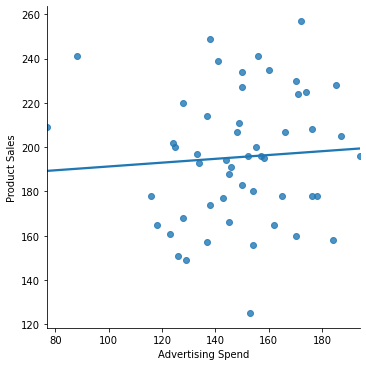

In [12]:
sns.lmplot(x='Advertising Spend', y='Product Sales', data=df, ci=None)

Visually we can see a weak relationship between Advertising spend and Product sales in this example. Some but certainly not all of the variation in Product Sales is explained by variation in Advertising spend

In [13]:
model.rsquared

0.0046393524604828595

Less than 1% of the variation in Product Sales is explained by variation in Advertising spend